In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Import additional required libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

## Importing and Modifying the Data

In [3]:
df = pd.read_csv('zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df1 = pd.read_csv('class.csv')
df1.head(7)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [5]:
# Joining datasets along the class number column present in both datasets
df = df.merge(df1,how='left',left_on='class_type',right_on='Class_Number')
df.head(0)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names


In [6]:
# Dropping unwanted columns
df.drop(['class_type', 'Number_Of_Animal_Species_In_Class','Animal_Names'], axis=1,inplace=True)
df.head(0)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Number,Class_Type


## Initial Evaluation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   animal_name   101 non-null    object
 1   hair          101 non-null    int64 
 2   feathers      101 non-null    int64 
 3   eggs          101 non-null    int64 
 4   milk          101 non-null    int64 
 5   airborne      101 non-null    int64 
 6   aquatic       101 non-null    int64 
 7   predator      101 non-null    int64 
 8   toothed       101 non-null    int64 
 9   backbone      101 non-null    int64 
 10  breathes      101 non-null    int64 
 11  venomous      101 non-null    int64 
 12  fins          101 non-null    int64 
 13  legs          101 non-null    int64 
 14  tail          101 non-null    int64 
 15  domestic      101 non-null    int64 
 16  catsize       101 non-null    int64 
 17  Class_Number  101 non-null    int64 
 18  Class_Type    101 non-null    object
dtypes: int64

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
animal_name,101,100,frog,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hair,101,NaN,NaN,NaN,0.425743,0.496921,0,0,0,1,1
feathers,101,NaN,NaN,NaN,0.19802,0.400495,0,0,0,0,1
eggs,101,NaN,NaN,NaN,0.584158,0.495325,0,0,1,1,1
milk,101,NaN,NaN,NaN,0.405941,0.493522,0,0,0,1,1
airborne,101,NaN,NaN,NaN,0.237624,0.42775,0,0,0,0,1
aquatic,101,NaN,NaN,NaN,0.356436,0.481335,0,0,0,1,1
predator,101,NaN,NaN,NaN,0.554455,0.499505,0,0,1,1,1
toothed,101,NaN,NaN,NaN,0.60396,0.491512,0,0,1,1,1
backbone,101,NaN,NaN,NaN,0.821782,0.384605,0,1,1,1,1


In [9]:
#Check Missing Values
df.isna().any()

animal_name     False
hair            False
feathers        False
eggs            False
milk            False
airborne        False
aquatic         False
predator        False
toothed         False
backbone        False
breathes        False
venomous        False
fins            False
legs            False
tail            False
domestic        False
catsize         False
Class_Number    False
Class_Type      False
dtype: bool

In [10]:
# Set default plot grid
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Histogram of Classes')

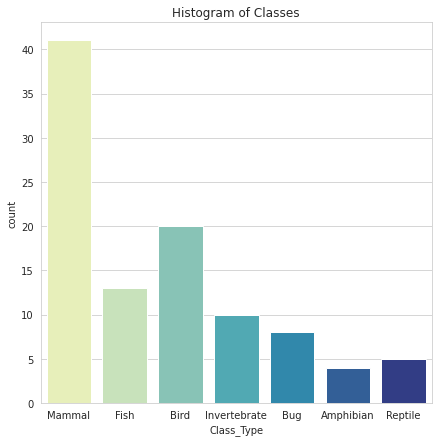

In [11]:
# Plot histogram of classes
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(df['Class_Type'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")

## Correlation Plot of 16 Animal Features

Text(0.5, 1.0, "Heatmap of Animal's Features")

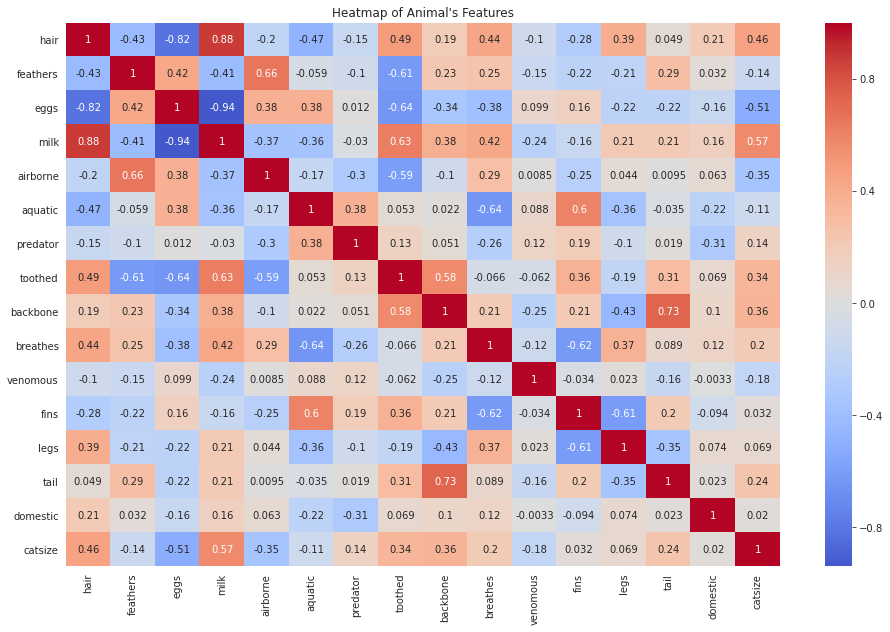

In [12]:
df_temp = df.iloc[:,1:-2].corr()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(df_temp, annot=True,fmt='.2g',cmap='coolwarm',center=0)
ax = plt.gca()
ax.set_title("Heatmap of Animal's Features")

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

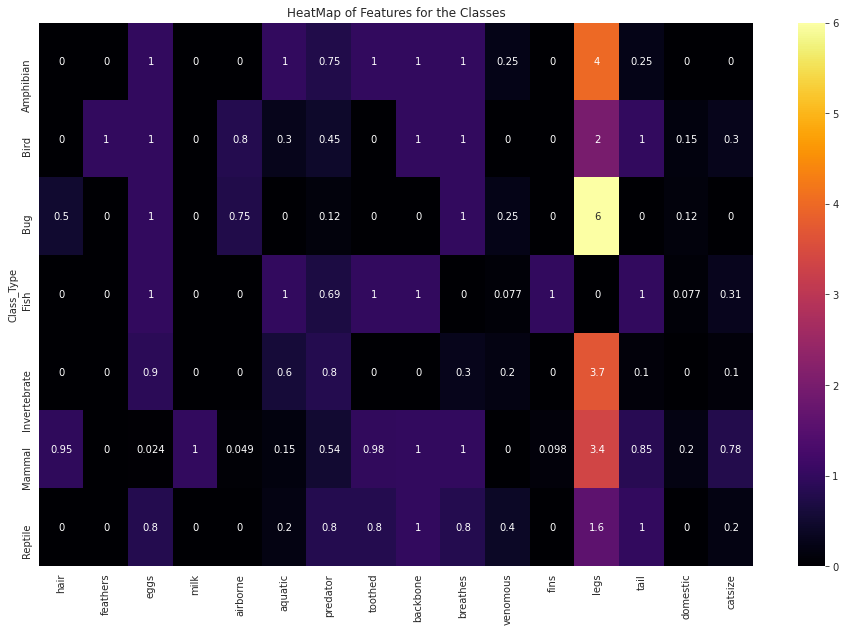

In [13]:
df_temp = df.drop(['Class_Number'], axis=1)
df_temp = df_temp.groupby(by='Class_Type').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(df_temp, annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

## Data Preparation
**Seperate Independent data(17) / Dependent data(1)**

Seperate by **x_data, y_data**
* x_data : columns(features to predict class_type) for training. (eliminate class_type)
* y_data : columns for comparing with predictions results. (need original class_type)

In [14]:
x_data = df.iloc[:,:-2]
y_data = df[['Class_Number']]

In [15]:
print("Feature Data :", x_data.shape)
print("Label Data :", y_data.shape)

Feature Data : (101, 17)
Label Data : (101, 1)


**Split x_data, y_data into training set and testing set.**

In [16]:
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)
print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (80, 17)
Testing Data has (21, 17)


**Drop animal_name column**
* Save the **animal_name** column for later combination(results).
* Drop the **animal_name** column in train, test datasets, because it's unnecessary for model learning predictions.

In [17]:
train_name = train_x['animal_name']
test_name = test_x['animal_name']

train_x = train_x.iloc[:,1:]
test_x = test_x.iloc[:,1:]

print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (80, 16)
Testing Data has (21, 16)


## Train model
* **Create and train knn classifier to use on zoo data**
* **Find the best K value for model**

In [18]:
test_scores = []
train_scores = []

for i in range(1,25):

    knn = KNeighborsClassifier(i)
    knn.fit(train_x, train_y)
    
    train_scores.append(knn.score(train_x,train_y))
    test_scores.append(knn.score(test_x,test_y))

In [19]:
## score dari data train
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [20]:
## score dari data test
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 100.0 % and k = [1]


## Visualization of Model Performance of Different n-Values

This is to help us better see which value of k works best with this model.

Text(0.5, 1.0, 'Model Performance of Different n-Values')

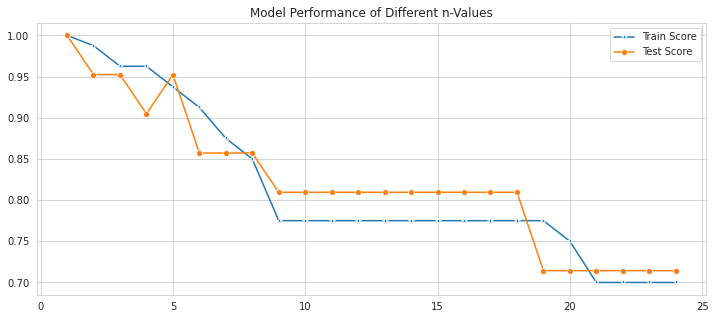

In [21]:
plt.rcParams['figure.figsize'] = (12,5)
sns.lineplot(range(1,25),train_scores,marker='*',label='Train Score')
sns.lineplot(range(1,25),test_scores,marker='o',label='Test Score')
ax = plt.gca()
ax.set_title("Model Performance of Different n-Values")

#### The best result is captured at k = 1 hence 1 is used for the final model

## Test and Evaluate model

Run predicitions on the test data

In [22]:
# Fit k-nearest neighbors classifier with training sets for k = 1
knn = KNeighborsClassifier(n_neighbors = int(max_train_score))
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [23]:
# Run prediction
pred_y = knn.predict(test_x)

Get the confusion matrix and classification report for model.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_y, pred_y)))

print('Micro Precision: {:.2f}'.format(precision_score(test_y, pred_y, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(test_y, pred_y, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(test_y, pred_y, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(test_y, pred_y, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(test_y, pred_y, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(test_y, pred_y, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(test_y, pred_y, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_y, pred_y, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_y, pred_y, average='weighted')))



Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


In [25]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(test_y, pred_y, target_names=['Mammal', 'Bird', 'Reptile','Fish','Amphibian','Bug','Invertebrate']))


Classification Report

              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00         8
        Bird       1.00      1.00      1.00         4
     Reptile       1.00      1.00      1.00         1
        Fish       1.00      1.00      1.00         3
   Amphibian       1.00      1.00      1.00         1
         Bug       1.00      1.00      1.00         2
Invertebrate       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [26]:
sub = pd.DataFrame()
sub['Name'] = test_name
sub['Predict_Type'] = pred_y
sub['Origin_Type'] = test_y
sub

,Name,Predict_Type,Origin_Type
89,toad,5,5
43,lark,2,2
12,chub,4,4
87,swan,2,2
47,lynx,1,1
49,mole,1,1
60,pike,4,4
40,housefly,6,6
10,cheetah,1,1
7,carp,4,4


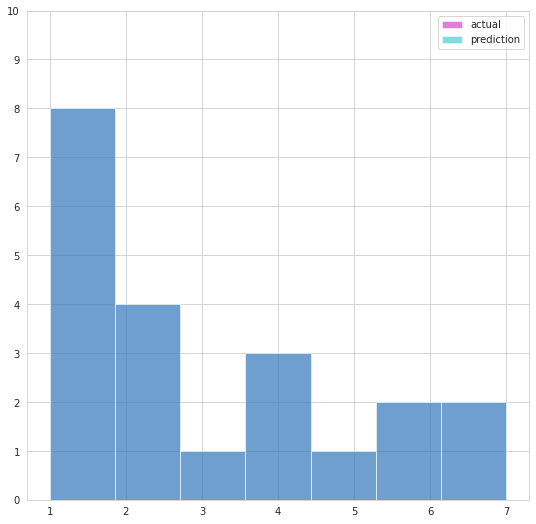

In [27]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(test_y, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred_y, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

What this figure tells us is the total number of animals in each class according to the test data and predicted data. <br>
We can see that the predictions matches all of the actual animal classifications (indicated by color overlap).

So we can see the level of accuracy for this particular classifier.